<a href="https://colab.research.google.com/github/chikusih/chikusih/blob/main/Hiv_Index1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import require Libraries

In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from tensorflow import feature_column
import itertools
plt.style.use('fivethirtyeight')

To get CSV file from the hard drive

In [5]:
# Get SCV FILE
from google.colab import files
uploaded = files.upload()

Saving Index_Bio_Data.csv to Index_Bio_Data.csv


In [6]:
import io
Index_data = pd.read_csv(io.BytesIO(uploaded['Index_Bio_Data.csv']))
# Dataset is now stored in a Pandas Dataframe
Index_data

,Index_Approached,Index_ARTStatus,Sex_Index,Relationship_Index,FamilyTree_Index,Client_Indexed?,Site_Index_found,Testing_History,Age,Status
0,1,Already enrolled,Female,Biological children,Yes,Index,Door-to-Door,Re-test,3,Negative
1,1,Already enrolled,Male,Biological children,Yes,Index,Door-to-Door,First-time tester,9,Negative
2,1,Already enrolled,Male,Biological children,Yes,Index,Door-to-Door,First-time tester,5,Negative
3,1,Already enrolled,Female,Biological children,Yes,Index,Door-to-Door,First-time tester,11,Negative
4,2,Already enrolled,Female,Biological children,Yes,Index,Door-to-Door,Re-test,3,Negative
...,...,...,...,...,...,...,...,...,...,...
16959,5909,Already enrolled,Male,Biological children,Yes,Index,Door-to-Door,First-time tester,10,Negative
16960,5909,Already enrolled,Female,Biological children,Yes,Index,Door-to-Door,First-time tester,5,Negative
16961,5909,Already enrolled,Female,Biological children,Yes,Index,Door-to-Door,Re-test,5,Negative
16962,5908,Newly diagnosed,Male,Sexual partner,Yes,Index,Door-to-Door,Re-test,50,Negative


In [7]:
# We drop some coloumns which have no impact to our target
New_data = Index_data.drop(columns=['Client_Indexed?' ])
New_data

,Index_Approached,Index_ARTStatus,Sex_Index,Relationship_Index,FamilyTree_Index,Site_Index_found,Testing_History,Age,Status
0,1,Already enrolled,Female,Biological children,Yes,Door-to-Door,Re-test,3,Negative
1,1,Already enrolled,Male,Biological children,Yes,Door-to-Door,First-time tester,9,Negative
2,1,Already enrolled,Male,Biological children,Yes,Door-to-Door,First-time tester,5,Negative
3,1,Already enrolled,Female,Biological children,Yes,Door-to-Door,First-time tester,11,Negative
4,2,Already enrolled,Female,Biological children,Yes,Door-to-Door,Re-test,3,Negative
...,...,...,...,...,...,...,...,...,...
16959,5909,Already enrolled,Male,Biological children,Yes,Door-to-Door,First-time tester,10,Negative
16960,5909,Already enrolled,Female,Biological children,Yes,Door-to-Door,First-time tester,5,Negative
16961,5909,Already enrolled,Female,Biological children,Yes,Door-to-Door,Re-test,5,Negative
16962,5908,Newly diagnosed,Male,Sexual partner,Yes,Door-to-Door,Re-test,50,Negative


We dont ave a target colum in our data set, therefore we are go to add colunm.

In [8]:
# adding target coloumn
Index_Approached_dict = {} 
for Index_Approached in New_data["Index_Approached"]:
    if not Index_Approached in Index_Approached_dict:
        Index_Approached_dict[Index_Approached] = 1
    else:
        Index_Approached_dict[Index_Approached] += 1
        Index_Approached_dict

In [9]:
for i in range(len(New_data)):
    Index_Approached = New_data.loc[i]["Index_Approached"]
    New_data.at[i,"number_of_Hivindex"] = Index_Approached_dict[Index_Approached]

In [10]:
New_data.head()

,Index_Approached,Index_ARTStatus,Sex_Index,Relationship_Index,FamilyTree_Index,Site_Index_found,Testing_History,Age,Status,number_of_Hivindex
0,1,Already enrolled,Female,Biological children,Yes,Door-to-Door,Re-test,3,Negative,4.0
1,1,Already enrolled,Male,Biological children,Yes,Door-to-Door,First-time tester,9,Negative,4.0
2,1,Already enrolled,Male,Biological children,Yes,Door-to-Door,First-time tester,5,Negative,4.0
3,1,Already enrolled,Female,Biological children,Yes,Door-to-Door,First-time tester,11,Negative,4.0
4,2,Already enrolled,Female,Biological children,Yes,Door-to-Door,Re-test,3,Negative,2.0


In [11]:
# We drop some coloumns which have no impact to our target
data = New_data.drop(columns=['Index_Approached' ])
data

,Index_ARTStatus,Sex_Index,Relationship_Index,FamilyTree_Index,Site_Index_found,Testing_History,Age,Status,number_of_Hivindex
0,Already enrolled,Female,Biological children,Yes,Door-to-Door,Re-test,3,Negative,4.0
1,Already enrolled,Male,Biological children,Yes,Door-to-Door,First-time tester,9,Negative,4.0
2,Already enrolled,Male,Biological children,Yes,Door-to-Door,First-time tester,5,Negative,4.0
3,Already enrolled,Female,Biological children,Yes,Door-to-Door,First-time tester,11,Negative,4.0
4,Already enrolled,Female,Biological children,Yes,Door-to-Door,Re-test,3,Negative,2.0
...,...,...,...,...,...,...,...,...,...
16959,Already enrolled,Male,Biological children,Yes,Door-to-Door,First-time tester,10,Negative,15.0
16960,Already enrolled,Female,Biological children,Yes,Door-to-Door,First-time tester,5,Negative,15.0
16961,Already enrolled,Female,Biological children,Yes,Door-to-Door,Re-test,5,Negative,15.0
16962,Newly diagnosed,Male,Sexual partner,Yes,Door-to-Door,Re-test,50,Negative,5.0


Data Exploration/ Data Visualization

In [12]:
#checking the data
data.isnull().sum()

Index_ARTStatus       0
Sex_Index             0
Relationship_Index    0
FamilyTree_Index      0
Site_Index_found      0
Testing_History       0
Age                   0
Status                0
number_of_Hivindex    0
dtype: int64

Fearturing Engineering

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

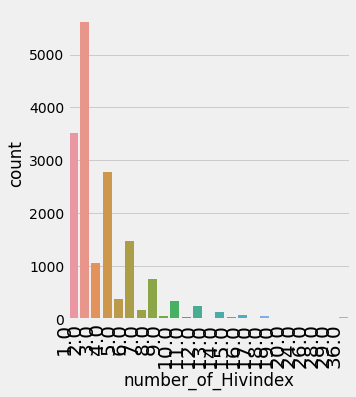

In [13]:
# Explore Target distribution 
sns.catplot(x ="number_of_Hivindex",kind="count", data=data)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


Aproached index number 2 has high number of client index .followed by  index number one , then . number four. Apprached index from number twenty have very few index client you can not even notes.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

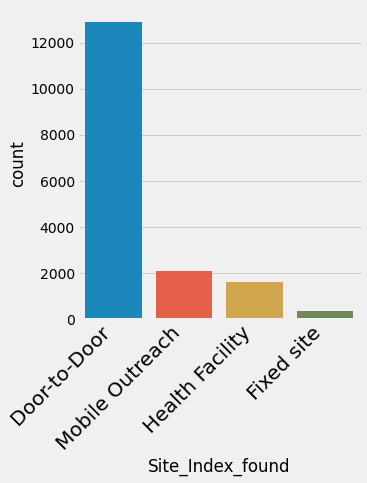

In [14]:
sns.catplot(x="Site_Index_found", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Many indexed client were found during door to door sercices and very few in a fixed site.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

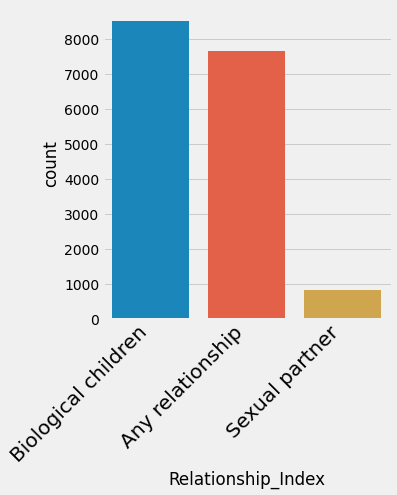

In [15]:
sns.catplot(x="Relationship_Index", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Hing number of indexed client are biological children , followed by any relationship and few number in Sexual partner.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

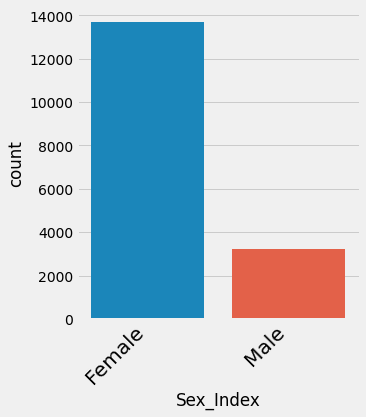

In [16]:
sns.catplot(x="Sex_Index", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Female has refered many people compared to male

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

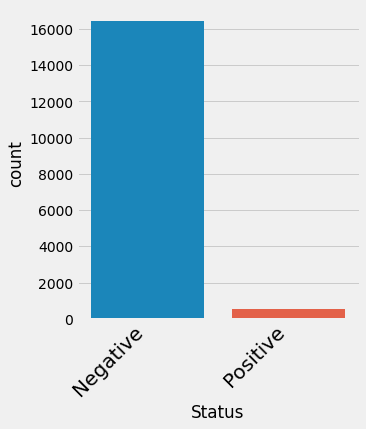

In [17]:
sns.catplot(x="Status", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Many people who have indexed are negative and few are positive

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

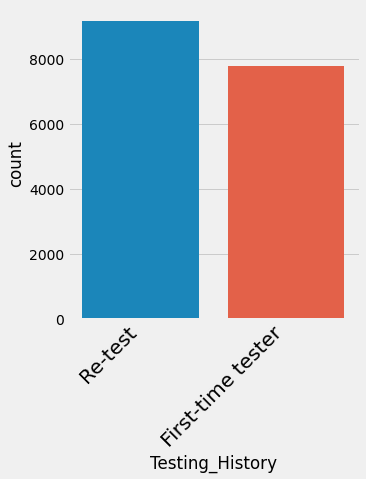

In [18]:
sns.catplot(x="Testing_History", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Number of indexed client is high in Re_test while low in first_time test

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

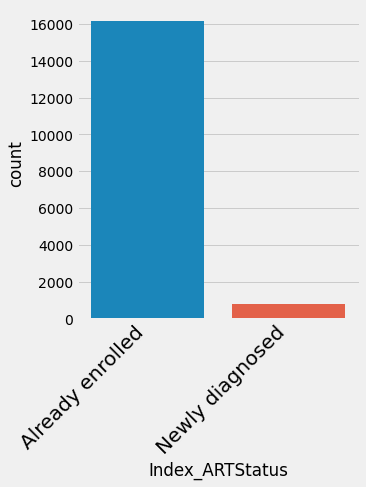

In [19]:
sns.catplot(x="Index_ARTStatus", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Number of approached index is high in already enrolled , and few are Newly diognosed.

Data processing

In [20]:

# Turn all categories into numbers
data_one_hot = pd.get_dummies(data)
data_one_hot.head() # view the converted columns

,Age,number_of_Hivindex,Index_ARTStatus_Already enrolled,Index_ARTStatus_Newly diagnosed,Sex_Index_Female,Sex_Index_Male,Relationship_Index_Any relationship,Relationship_Index_Biological children,Relationship_Index_Sexual partner,FamilyTree_Index_No,FamilyTree_Index_Yes,Site_Index_found_Door-to-Door,Site_Index_found_Fixed site,Site_Index_found_Health Facility,Site_Index_found_Mobile Outreach,Testing_History_First-time tester,Testing_History_Re-test,Status_Negative,Status_Positive
0,3,4.0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0
1,9,4.0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0
2,5,4.0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0
3,11,4.0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0
4,3,2.0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0


Now we'll split data into features (X) and labels (y).

In [21]:
# Create X & y values
X = data_one_hot.drop("number_of_Hivindex", axis=1)
y = data_one_hot["number_of_Hivindex"]

In [22]:
# View features
X.head()

,Age,Index_ARTStatus_Already enrolled,Index_ARTStatus_Newly diagnosed,Sex_Index_Female,Sex_Index_Male,Relationship_Index_Any relationship,Relationship_Index_Biological children,Relationship_Index_Sexual partner,FamilyTree_Index_No,FamilyTree_Index_Yes,Site_Index_found_Door-to-Door,Site_Index_found_Fixed site,Site_Index_found_Health Facility,Site_Index_found_Mobile Outreach,Testing_History_First-time tester,Testing_History_Re-test,Status_Negative,Status_Positive
0,3,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0
1,9,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0
2,5,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0
3,11,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0
4,3,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0


Bulding the model

In [23]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [24]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
425/425 [==============================] - 1s 1ms/step - loss: 2.5059 - mae: 2.5059
Epoch 2/100
425/425 [==============================] - 0s 1ms/step - loss: 2.3732 - mae: 2.3732
Epoch 3/100
425/425 [==============================] - 0s 1ms/step - loss: 2.3917 - mae: 2.3917
Epoch 4/100
425/425 [==============================] - 0s 1ms/step - loss: 2.3532 - mae: 2.3532
Epoch 5/100
425/425 [==============================] - 0s 973us/step - loss: 2.3704 - mae: 2.3704
Epoch 6/100
425/425 [==============================] - 0s 946us/step - loss: 2.3734 - mae: 2.3734
Epoch 7/100
425/425 [==============================] - 0s 1ms/step - loss: 2.3797 - mae: 2.3797
Epoch 8/100
425/425 [==============================] - 0s 1ms/step - loss: 2.3736 - mae: 2.3736
Epoch 9/100
425/425 [==============================] - 0s 949us/step - loss: 2.3603 - mae: 2.3603
Epoch 10/100
425/425 [==============================] - 0s 975us/step - loss: 2.3838 - mae: 2.3838
Epoch 11/100
425/425 [=========

In [40]:
#y_preds_1 = model_1.predict(X_test)

#y_preds_1

Evaluate our model

In [26]:
# Check the results of the  model
model_1_loss, model_1_mae = model_1.evaluate(X_test, y_test)

107/107 [==============================] - 0s 939us/step - loss: 2.2119 - mae: 2.2119


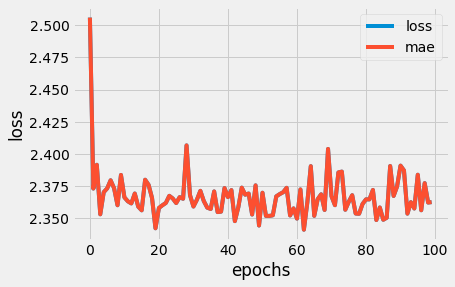

In [27]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Test again with another model

In [28]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history = model_2.fit(X_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output


prediction for model 2

In [29]:
y_preds_2 = model_2.predict(X_test)
y_preds_2

array([[1.9937788],
       [2.0187223],
       [1.9979495],
       ...,
       [1.9945916],
       [1.9954906],
       [2.011481 ]], dtype=float32)

In [30]:
# Check the results of the  model_2
model_2_loss, model_2_mae = model_2.evaluate(X_test, y_test)

107/107 [==============================] - 0s 888us/step - loss: 2.1820 - mae: 2.1820


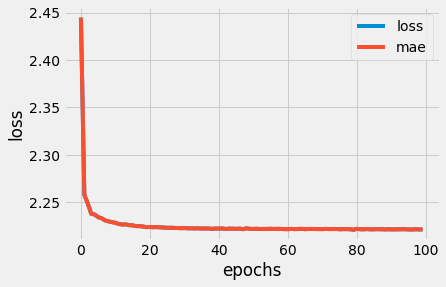

In [31]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [32]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [33]:
#y_preds_3 = model_3.predict(X_test)
#y_preds_3

In [34]:
# Check the results of the insurance model
model_3_loss, model_3_mae = model_3.evaluate(X_test, y_test)

107/107 [==============================] - 0s 1ms/step - loss: 2.1852 - mae: 2.1852


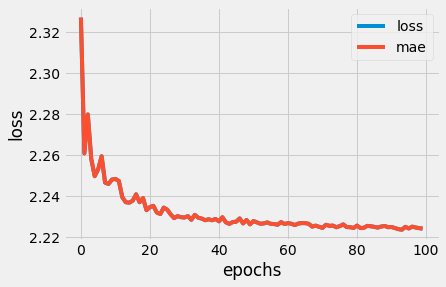

In [35]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Comparing result

In [36]:
model_results = [["model_1", model_1_loss, model_1_mae],
                 ["model_2", model_2_loss, model_2_mae],
                 ["model_3", model_3_loss, model_3_mae]]

In [37]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "loss", "mae"])
all_results

,model,loss,mae
0,model_1,2.211857,2.211857
1,model_2,2.182008,2.182008
2,model_3,2.185189,2.185189


Model _2 is the most compare to the other two, I has lower lavue of the metric and its graph is curve .It just has like a stable value.

Using the best model lets do the prediction

In [39]:
#y_preds_3 = model_3.predict(X_test)
#y_preds_3

Using model_2, to make prediction of our model

In [43]:
predictions = model_2.predict(X_test)
predictions

array([[1.9937788],
       [2.0187223],
       [1.9979495],
       ...,
       [1.9945916],
       [1.9954906],
       [2.011481 ]], dtype=float32)

 model Validation.